In [1]:
s1 = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps'
s2 = '/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c'

In [2]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import os
import curvedsky as cs

In [3]:
mass1 = hp.read_alm(os.path.join(s1,'MASS','phi_sims_0000.fits'))

In [4]:
mass2 = hp.read_alm(os.path.join(s2,'MASS','phi_sims.fits'))

### Cl_pp

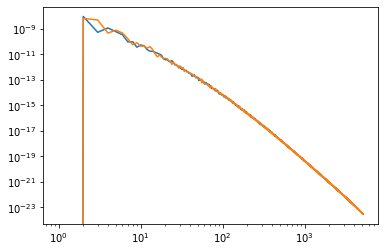

In [5]:
plt.loglog(hp.alm2cl(mass1))
plt.loglog(hp.alm2cl(mass2))

### CMB only sim

In [6]:
cmb1 = hp.ud_grade(hp.read_map(os.path.join(s1,'CMB','cmb_sims_0000.fits'),(0,1,2)),256)

In [7]:
cmb2 = hp.ud_grade(hp.read_map(os.path.join(s2,'CMB','cmb_sims_0000.fits'),(0,1,2)),256)

In [8]:
alm1 = hp.map2alm(cmb1)
alm2 = hp.map2alm(cmb2)

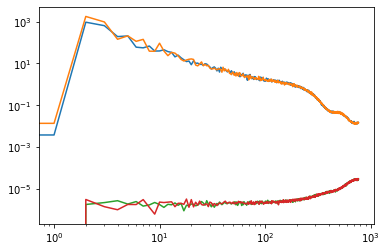

In [9]:
plt.loglog(hp.alm2cl(alm1[0]))
plt.loglog(hp.alm2cl(alm2[0]))
plt.loglog(hp.alm2cl(alm1[2]))
plt.loglog(hp.alm2cl(alm2[2]))

In [10]:
import sys

In [11]:
sys.path.append('../')

In [12]:
%load_ext autoreload
%autoreload 2
from simulation import SimExperimentFG
from filtering import Filtering

In [13]:
sim1 = SimExperimentFG.from_ini('../LB_FG2.ini')
sim2 = SimExperimentFG.from_ini('../LB_FG2_n1.ini')

/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/s1d1
/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/N1/s1d1


### Component Sep

In [14]:
c_cmb1 = sim1.get_cleaned_cmb(0)
c_cmb2 = sim2.get_cleaned_cmb(0)

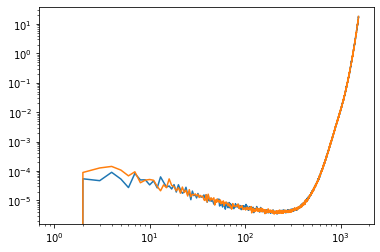

In [15]:
plt.loglog(hp.alm2cl(c_cmb1[2],c_cmb1[2]))
plt.loglog(hp.alm2cl(c_cmb2[2],c_cmb2[2]))

### ILC weighted Noise spectra

In [16]:
nt1,ne1,nb1 = sim1.noise_spectra(500)
nt2,ne2,nb2 = sim2.noise_spectra(100)

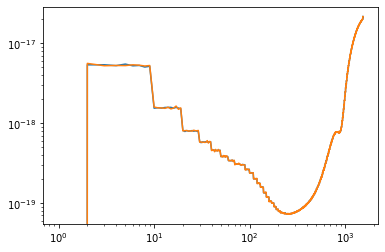

In [17]:
plt.loglog(nb1)
plt.loglog(nb2)

### CINV filtering 

In [18]:
filt1 = Filtering.from_ini('../LB_FG2.ini')
filt2 = Filtering.from_ini('../LB_FG2_n1.ini')

/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/DELL/s1d1
/project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/
using /project/projectdirs/litebird/simulations/maps/lensing_project_paper/S4BIRD/CMB_Lensed_Maps_c/CMB/ and /global/cscratch1/sd/lonappan/S4BIRD/FG saving to /global/cscratch1/sd/lonappan/S4BIRD/N1/s1d1


### Beam convolved spectra to filter

In [19]:
t1,e1,b1 = filt1.convolved_TEB(0)
t2,e2,b2 = filt2.convolved_TEB(0)

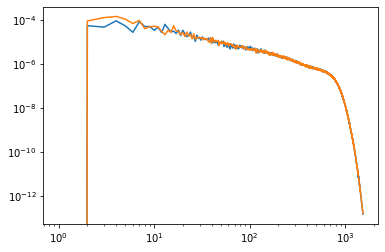

In [20]:
plt.loglog(hp.alm2cl(b1))
plt.loglog(hp.alm2cl(b2))

### noise spectra for filtering inl = NL 

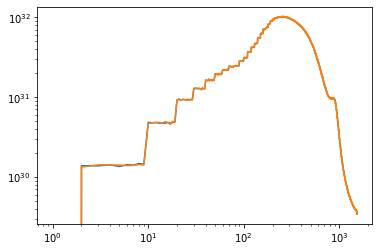

In [21]:
plt.loglog(filt1.NL[1][0])
plt.loglog(filt2.NL[1][0])

### CINV filtered E B

In [22]:
e1,b1 = filt1.cinv_EB(0)
e2,b2 = filt2.cinv_EB(0)

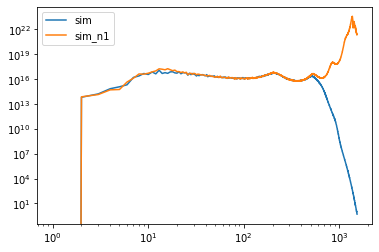

In [23]:
plt.loglog(cs.utils.alm2cl(filt1.lmax,e1),label='sim')
plt.loglog(cs.utils.alm2cl(filt1.lmax,e2),label='sim_n1')
plt.legend()

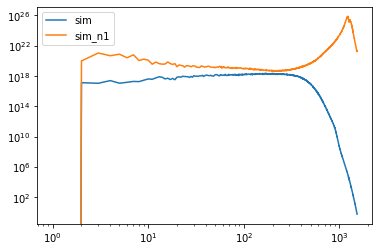

In [24]:
plt.loglog(cs.utils.alm2cl(filt1.lmax,b1),label='sim')
plt.loglog(cs.utils.alm2cl(filt1.lmax,b2),label='sim_n1')
plt.legend()